Angelo Zhu
59714552

## Problem 1: Clustering

### Part 1

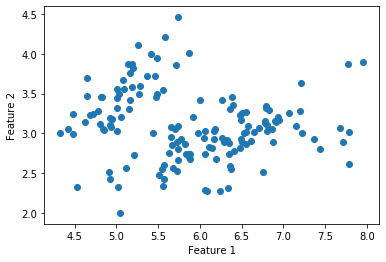

In [5]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

iris = np.genfromtxt('C:/Users/Angelo/Downloads/178-hw5-code/data/iris.txt'
                     , delimiter=None)
data,Y = iris[:,:2], iris[:,-1]
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

I think there are 3 clusters. One cluster to group the data gathered in the top left. A second cluster to group the few points gathered in the bottom left. And a third cluster to group the few points on the far right. The big chunk seen around (6.5, 3.0) can be split into two clusters grouped by my idea of the second and third cluster.

### Part 2

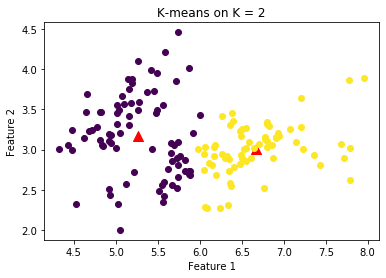

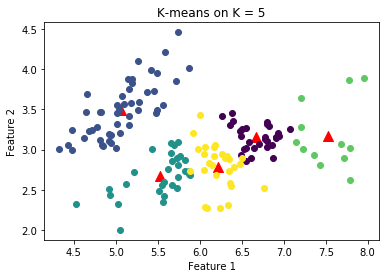

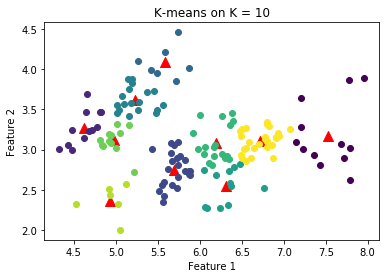

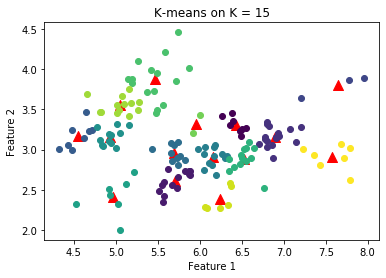

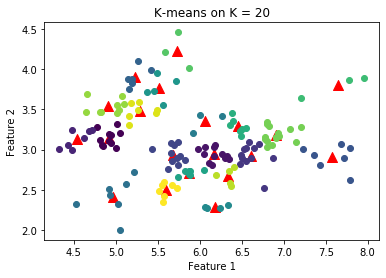

In [2]:
for i in [2,5,10,15,20]:
    z, centers, sum_distances = ml.cluster.kmeans(data, i)
    ml.plotClassify2D(None, data, z)
    plt.scatter(centers[:,0], centers[:,1], color='red', marker='^', s=100)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means on K = {}'.format(str(i)))
    plt.show()

Of my chosen k values, k = 5 seems to be the best option. Although as k increases, the sum of the euclidean distance decreases, large k's seem to overfit our data. K = 5 seems to gather the outliered points that do not have intuitive groupings well, while not underfitting or overfitting the data.

### Part 3

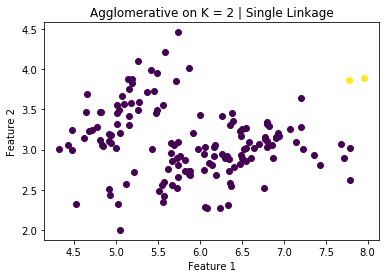

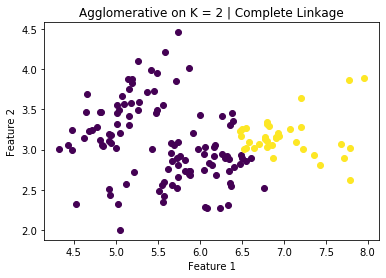

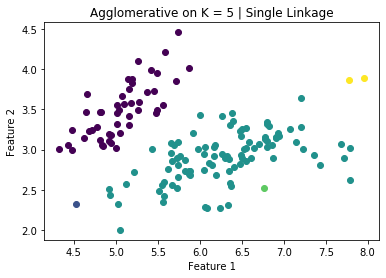

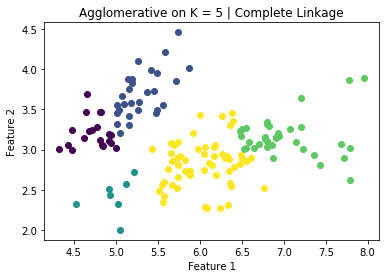

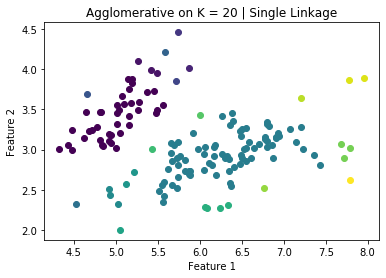

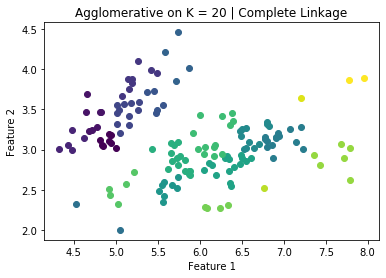

In [3]:
d = {'min':'Single Linkage', 'max':'Complete Linkage'}
for i in [2,5,20]:
    for linkage in ['min','max']:
        z, join = ml.cluster.agglomerative(data, i, method=linkage)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Agglomerative on K = {} | {}'.format(str(i), d[linkage]))
        ml.plotClassify2D(None, data, z)
        plt.show()
        
        
        
        

### Part 4
As K gets larger, Agglomerative tends to output large bodies mixed with few outliered points that cluster together while K-means will start overfitting. Agglomerative does not have a center point like in K-means. 
K-means and agglomerative using complete linkage produce fairly similar results especially at low values of K.

## Problem 2: EigenFaces

### Part 1

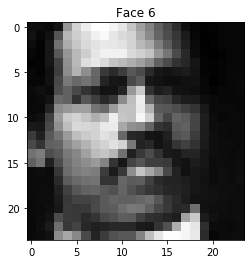

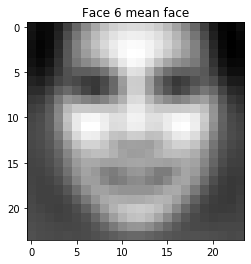

In [11]:
X = np.genfromtxt("C:/Users/Angelo/Downloads/178-hw5-code/data/faces.txt"
                  ,delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
i = 6
img = np.reshape(X[i,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint
plt.title("Face 6")
plt.show()


mean = np.mean(X,axis=0,keepdims=True)
X0 = X - mean
img = np.reshape(mean, (24,24))
plt.imshow(img.T, cmap="gray")
plt.title("Face 6 mean face")
plt.show()

### Part 2

In [13]:
from scipy import linalg

U, S, Vh = linalg.svd(X0, full_matrices=False)
W = U.dot(np.diag(S))
print("W shape:", W.shape)
print("Vh shape:", Vh.shape)

W shape: (4916, 576)
Vh shape: (576, 576)


### Part 3

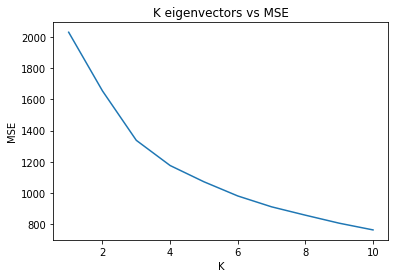

In [14]:
eigenvectors = [1,2,3,4,5,6,7,8,9,10]
k_mse = [None] * 10
for i,k in enumerate(eigenvectors):
    X0_hat = np.dot(W[:,:k], Vh[:k,:])
    k_mse[i] = np.mean((X0 - X0_hat) ** 2)
    
plt.plot(eigenvectors, k_mse)
plt.title("K eigenvectors vs MSE")
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

### Part 4

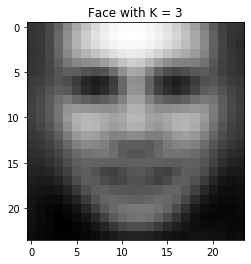

In [15]:
j = 3
a = 2*np.median(np.abs(W[:,j]))
face = mean + a*Vh[j,:]
img = np.reshape(face,(24,24))
plt.imshow(img.T, cmap="gray")
plt.title("Face with K = 3")
plt.show()

### Part 5

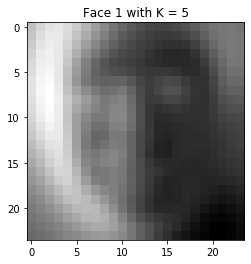

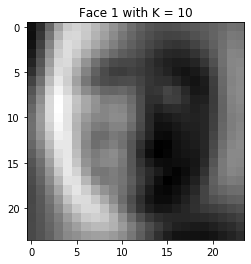

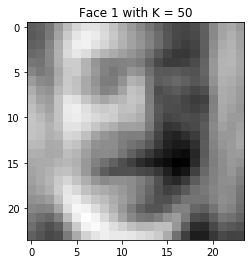

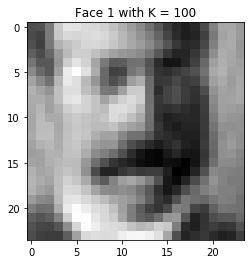

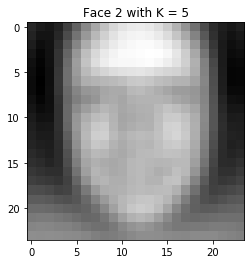

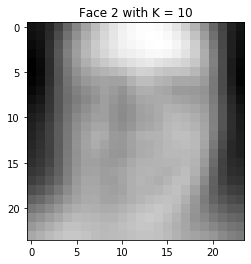

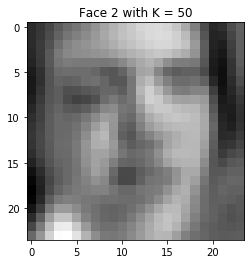

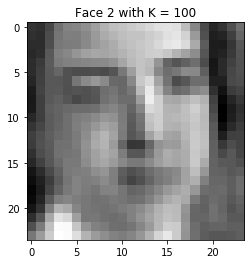

In [16]:
principal_dir = [5,10,50,100]
for k in principal_dir:
    X0_hat = W[:,:k].dot(Vh[:k,:])
    face1 = X0_hat[1,:]
    img = np.reshape(face1,(24,24))
    plt.imshow(img.T, cmap="gray")
    plt.title("Face 1 with K = " + str(k))
    plt.show()
for k in principal_dir:
    X0_hat = W[:,:k].dot(Vh[:k,:])
    face2 = X0_hat[2,:]
    img = np.reshape(face2, (24,24))
    plt.imshow(img.T, cmap="gray")
    plt.title("Face 2 with K = " + str(k))
    plt.show()
#### for saving as pdf formatting purposes
for i in range(10):
    print()

### Part 6

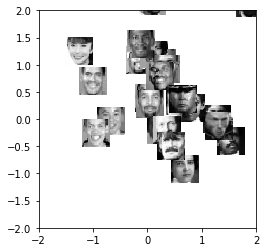

In [17]:
idx = list(range(1,26)) # pick some data (randomly or otherwise); an array of integer indices

import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
plt.figure()

for i in idx:
    # compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale

### Problem 3
piazza, discussion slides